# Введение

### Задача
Онлайн-курсы в настоящее время весьма популярны, однако среди большого числа людей, которые начинают обучение, многие покидают курс и не заканчивают его. Задачей настоящего исследования является понимание причин этой тенденции и изучение поведения пользователя в первые дни обучения для прогнозирования того, завершит ли он курс в дальнейшем.

### Актуальность исследования
Актуальность данного исследования обусловлена растущей популярностью онлайн-образования и необходимостью повышения качества учебного процесса. Высокий уровень оттока пользователей из курсов может негативно сказываться как на эффективности учебных программ, так и на финансовых результатах платформ, предлагающих такие курсы. Понимание причин, по которым студенты покидают курсы, позволит разработать более эффективные стратегии удержания и повышения вовлеченности, что, в свою очередь, приведет к улучшению результатов обучения и удовлетворенности студентов.

### Потенциальная польза
Исследование может стать важным инструментом для разработчиков и преподавателей онлайн-курсов, позволяя им:
- Выявить основные факторы, способствующие оттоку пользователей.
- Оптимизировать содержание и структуру курса, чтобы повысить привлекательность и доступность.
- Разработать целевые стратегии поддержки и вовлечения студентов на ранних этапах обучения, что может способствовать увеличению завершенности курсов.
- Создать прогностические модели, которые помогут предсказать поведение студентов на основании их взаимодействия с материалом в первые дни обучения.

Таким образом, результаты исследования могут способствовать не только улучшению конкретного курса «Введение в анализ данных на R», но и оказать влияние на развитие онлайн-образования в целом.

### Оглавление
...

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys

sys.path.append('d:\\diplom\\product\\insight_pulse')

for path in sys.path:
    print(path)

D:\pythonProg\Python\Python312\python312.zip
D:\pythonProg\Python\Python312\DLLs
D:\pythonProg\Python\Python312\Lib
D:\pythonProg\Python\Python312
d:\diplom\.venv

d:\diplom\.venv\Lib\site-packages
d:\diplom\.venv\Lib\site-packages\win32
d:\diplom\.venv\Lib\site-packages\win32\lib
d:\diplom\.venv\Lib\site-packages\Pythonwin
d:\diplom\product\insight_pulse


In [3]:
from eventframing.eventframe import EventFrame
from eventframing.cols_schema import EventFrameColsSchema
from eventframing.event_type import EventType

from data_preprocessing.data_preprocessor import DataPreprocessor
from data_preprocessing.preprocessors_lib.add_start_end_events import AddStartEndEventsPreprocessor
from data_preprocessing.preprocessors_lib.split_sessions import SplitSessionsPreprocessor

from ux_researching.descriptive_stats import DescStatsAnalyzer

# Разведовательный анализ данных

### Источник данных
Данные для данного исследования предоставлены платформой Stepic и содержат журналы активности десятков тысяч пользователей на курсе "Введение в анализ данных на R". Эти данные являются реальными записями, что делает их особенно ценными для анализа поведения пользователей в контексте онлайн-обучения. Доступ к таким историческим данным позволяет выявить закономерности и провести достоверный анализ причин оттока пользователей.

### Описание структуры файлов

#### 1. Структура файла `events_data`
Файл `events_data` содержит информацию о действиях пользователей на курсе и включает следующие поля:

- **step_id**: ID стэпа, который указывает на конкретный шаг в курсе.
- **user_id**: Анонимизированный ID пользователя, что позволяет отслеживать активность без раскрытия личных данных.
- **timestamp**: Время наступления события в формате Unix Date, которое позволяет точно фиксировать, когда произошло конкретное действие.
- **action**: Событие, отражающее интерактивность пользователя с курсом. Возможные значения включают:
  - **discovered**: пользователь перешел на стэп.
  - **viewed**: пользователь просмотрел шаг.
  - **started_attempt**: начало попытки решить шаг; ранее пользователю необходимо было явно нажать на кнопку "начать решение", прежде чем приступить к решению практического стэпа.
  - **passed**: удачное решение практического шага.

#### 2. Структура файла `submissions`
Файл `submissions` содержит данные о попытках решить практические задания и включает следующие поля:

- **step_id**: ID стэпа, к которому относится отправленное решение.
- **timestamp**: Время отправки решения в формате Unix Date, позволяющее отслеживать, когда пользователь попытался решить задачу.
- **submission_status**: Статус решения, отражающий результат попытки пользователя (например, успешное или неуспешное решение).
- **user_id**: Анонимизированный ID пользователя, что дает возможность связать попытки с конкретными участниками курса.

Эти структуры данных обеспечивают обширные возможности для анализа поведения пользователей, выявления проблем и формирования рекомендаций по увеличению вовлеченности и снижению оттока студентов из курса.

In [4]:
DATA_PATH = 'datasets'

## Загрузка и предобработка данных 

In [5]:
events = pd.read_csv(f"{DATA_PATH}/event_data_train.csv")
submissions = pd.read_csv(f"{DATA_PATH}/submissions_data_train.csv")

In [6]:
events["timestamp"] = pd.to_datetime(events["timestamp"], origin='unix', unit='s')
submissions["timestamp"] = pd.to_datetime(submissions["timestamp"], origin='unix', unit='s')

In [7]:
events["date"] = pd.to_datetime(events["timestamp"].dt.date)
submissions["date"] = pd.to_datetime(submissions["timestamp"].dt.date)

In [8]:
events.head()

,step_id,timestamp,action,user_id,date
0,32815,2015-06-15 04:00:48,viewed,17632,2015-06-15
1,32815,2015-06-15 04:00:48,passed,17632,2015-06-15
2,32815,2015-06-15 04:00:48,discovered,17632,2015-06-15
3,32811,2015-06-15 04:01:35,discovered,17632,2015-06-15
4,32811,2015-06-15 04:01:35,viewed,17632,2015-06-15


In [9]:
submissions.head()

,step_id,timestamp,submission_status,user_id,date
0,31971,2015-06-15 06:21:15,correct,15853,2015-06-15
1,31972,2015-06-15 06:05:00,correct,15853,2015-06-15
2,31972,2016-11-11 08:15:49,wrong,15853,2016-11-11
3,31972,2016-11-11 08:16:04,correct,15853,2016-11-11
4,31976,2015-06-15 06:02:03,wrong,15853,2015-06-15


In [10]:
# Поскольку файл submissions содержит только информацию о практических заданиях,
# то будем считать, что степы, которые там не встречаются - теоретические степы.
practise_steps =  submissions['step_id'].unique()
events['step_status'] = np.where(events['step_id'].isin(practise_steps), 'practise', 'theory')

In [11]:
# Посколку попытки решения практических заданий нужно тоже восприримать как собяия
# Добавим их к набору данных о событиях
# Однако чтобы избежать дублирования успешонго решения добавим только информаицю о неудачах
failed_submissions = submissions[submissions['submission_status'] == 'wrong'].copy()
failed_submissions['step_status'] = 'practise'
failed_submissions['action'] = 'failed'
failed_submissions = failed_submissions.loc[:, ['user_id', 'step_id', 'action', 'timestamp', 'step_status']]

events = pd.concat(
    [events, failed_submissions], axis=0
).sort_values(by=['user_id', 'timestamp'])

del failed_submissions



In [12]:
events.shape

(3767102, 6)

In [13]:
# Для более детального понимания к действию добавим тип шага
# На котром это действие было совершено

events['action'] = events['action'] + '_' + events['step_status']

In [14]:
events.head()

,step_id,timestamp,action,user_id,date,step_status
1347416,31981,2016-09-02 14:44:24,viewed_practise,1,2016-09-02,practise
1347417,31981,2016-09-02 14:44:24,discovered_practise,1,2016-09-02,practise
2874398,32815,2017-12-27 14:02:44,discovered_theory,2,2017-12-27,theory
2874399,32815,2017-12-27 14:02:44,viewed_theory,2,2017-12-27,theory
2874400,32815,2017-12-27 14:02:44,passed_theory,2,2017-12-27,theory


In [15]:
# Для описания наборов данных можно использовать стандартные инстурменты
events.describe()

,step_id,timestamp,user_id,date
count,3.767102e+06,3767102,3.767102e+06,3480703
mean,3.473878e+04,2016-11-29 12:26:59.436603648,1.330288e+04,2016-11-27 09:03:34.848667392
min,3.045600e+04,2015-06-15 04:00:48,1.000000e+00,2015-06-15 00:00:00
25%,3.217700e+04,2015-12-18 17:55:28,6.626000e+03,2015-12-16 00:00:00
50%,3.292900e+04,2017-01-11 02:20:07,1.318900e+04,2017-01-08 00:00:00
75%,3.348100e+04,2017-10-15 12:21:08.500000,2.012200e+04,2017-10-13 00:00:00
max,1.584330e+05,2018-05-19 23:33:31,2.679800e+04,2018-05-19 00:00:00
std,1.377292e+04,NaN,7.783315e+03,NaN


## Статистики событий и диаграмма жизни

In [19]:
# Однако это дает довольно скудное представление о данных.
# Для получения более подробной информации можно использовать специальные инструменты
from eventframing.eventframe import EventFrame

# Создаем схему соответсвия колонок исходных данных и их назначения в фрейме событий
cols_schema={
    'user_id': 'user_id',
    'event_name': 'action',
    'event_timestamp': 'timestamp',
}

# Создаем фрейм событий и передаем в него данные о событиях и схему соответсвия колонок
events_frame = EventFrame(
    data=events,
    cols_schema=cols_schema
)


In [17]:
# Теперь помимо оригинальных даннных в набое данных также присутствует набор служебных полей
events_frame.to_dataframe().head()

,step_id,timestamp,action,user_id,date,step_status,event_id,event_type,event_type_index
1347416,31981,2016-09-02 14:44:24,viewed_practise,1,2016-09-02,practise,0,raw,2
1347417,31981,2016-09-02 14:44:24,discovered_practise,1,2016-09-02,practise,1,raw,2
2874398,32815,2017-12-27 14:02:44,discovered_theory,2,2017-12-27,theory,2,raw,2
2874399,32815,2017-12-27 14:02:44,viewed_theory,2,2017-12-27,theory,3,raw,2
2874400,32815,2017-12-27 14:02:44,passed_theory,2,2017-12-27,theory,4,raw,2


In [18]:
# Мы можем описать набор данных используя специальные инструменты
DescStatsAnalyzer.describe(events_frame, add_session_stats=False)

value
category          metric                                     
overall           unique_users                          19234
                  unique_events                             8
                  frame_start             2015-06-15 04:00:48
                  frame_end               2018-05-19 23:33:31
                  frame_duration           1069 days 19:32:43
path_duration     mean             72 days 19:15:53.152958303
                  median                      0 days 07:41:20
                  std             175 days 09:21:44.737678184
                  min                         0 days 00:00:00
                  max                      1064 days 17:42:27
path_steps_length mean                               195.8564
                  median                                 32.0
                  std                              456.389791
                  min                                       1
                  max                                   33043

Такой формат анализа дает куда более обширное представление о данных:
- Мы понимаем что горизонт исследования - три года, а значит можно делать уверенные выводы и отслеживать изменения тенденций
- Крайне наглядна видна проблема *раннего оттока* пользователей, т.к. среднее время пребываняи на курсе - 72 дня, а медианное - всего 8 часов
    - Это значит что **50% пользователей не возвращаются на курс даже на следующий день**
- При этом судя по тому что 50% пользователей совершили хотя бы 30 действий говорит о том, что первые шаги курса все таки успешно проходятся

Добавим статистики о конкретных событиях

In [19]:
DescStatsAnalyzer.describe_events(events_frame, add_session_stats=False)

action     overall                                \
                            event_count unique_users event_percentage   
0       discovered_practise      255606        13697         6.785216   
1         discovered_theory      433889        17197        11.517846   
2           failed_practise      286399         7765         7.602635   
3           passed_practise      216442         9794         5.745584   
4             passed_theory      433889        17197        11.517846   
5  started_attempt_practise      310047        11400         8.230385   
6           viewed_practise      713088        13697        18.929352   
7             viewed_theory     1117742        17198        29.671137   

                    time_to_first_occurrence                  \
  user_percentage                       mean          median   
0       71.212436  4 days 16:44:20.486091844 0 days 00:00:33   
1       89.409379  0 days 02:21:43.190963540 0 days 00:00:00   
2       40.371218 20 days 16:22:49.607469414 0 days 03:04:01   
3       50.920245  9 days 00:04:42.898100878 0 days 00:01:29   
4       89.409379  0 days 02:21:43.190963540 0 days 00:00:00   
5       59.270043  8 days 12:43:07.129736842 0 days 00:00:56   
6       71.212436  4 days 16:43:10.710301525 0 days 00:00:33   
7       89.414578  0 days 02:20:33.757588091 0 days 00:00:00   

                                                                 \
                         std             min                max   
0 37 days 16:19:54.248785551 0 days 00:00:00  871 days 21:05:53   
1  5 days 02:12:42.333069459 0 days 00:00:00  553 days 14:24:17   
2 81 days 10:12:20.269079278 0 days 00:00:03  938 days 01:21:23   
3 54 days 06:28:00.099410415 0 days 00:00:02  882 days 04:41:31   
4  5 days 02:12:42.333069459 0 days 00:00:00  553 days 14:24:17   
5 56 days 06:20:51.434016117 0 days 00:00:00 1008 days 18:26:27   
6 37 days 16:19:58.213889577 0 days 00:00:00  871 days 21:05:53   
7  5 days 02:11:56.940635428 0 days 00:00:00  553 days 14:24:17   

  steps_to_first_occurrence                              
                       mean median        std min   max  
0                  8.201577    8.0   8.496539   1   452  
1                  2.110659    2.0   3.961098   1   491  
2                 57.362910   52.0  45.148937   2   811  
3                 14.829998   10.0  19.709231   2   643  
4                  2.122405    2.0   3.989033   1   492  
5                 12.178860    9.0  48.719654   1  4335  
6                  8.178214    8.0   8.177169   1   453  
7                  2.101000    2.0   1.352540   1    84

Пока глобальные выводы делать рано но этот инструмент дает понять несколько очень важных фактов:
1. Только 60 % от всех пользователей начали решать хотя бы один практический степ
2. Только в 40% случаев после просмотра практического шага начиналось его решение
3. При этом у 50% пользователей из тех, кто все таки дошел про практического шага это заняло менее минуты и 9 действий (то есть три степа)

Это все может наводить на мысли, что практические задания в курсе располагаются достаточно рано и ученики оказываются к ним не готовы.  


Однако все не так однозначно и с теоретическими шагами:
1. Только в 38% случаев после просмотра теоретического шага он был успешно решен
2. Только 90% пользоватлей зашли хотя бы на один теоретический шаг, что говорит о том, что есть пользователи которые сразу начали прохождение с практического шага и видимо там же его и закончили

Теперь уместно отобразить *диаграмму времени жизни ползователя*, чтобы понять насколько долго они остаются на курсе  
Однако мы выяснили что половина всей аудитории не возвращается на курс даже на следующий день, поэтому предварительно уместно ббудет исключить пользователей, которые провели в продукте только 1 день

In [29]:
one_day_users = events.groupby('user_id').agg({'date': 'nunique'}).reset_index()
one_day_users = one_day_users[one_day_users['date'] == 1]['user_id']

print(f'Количество пользователей, которые лишь однажды зашли на курс: {one_day_users.shape[0]}')


Количество пользователей, которые лишь однажды зашли на курс: 9708


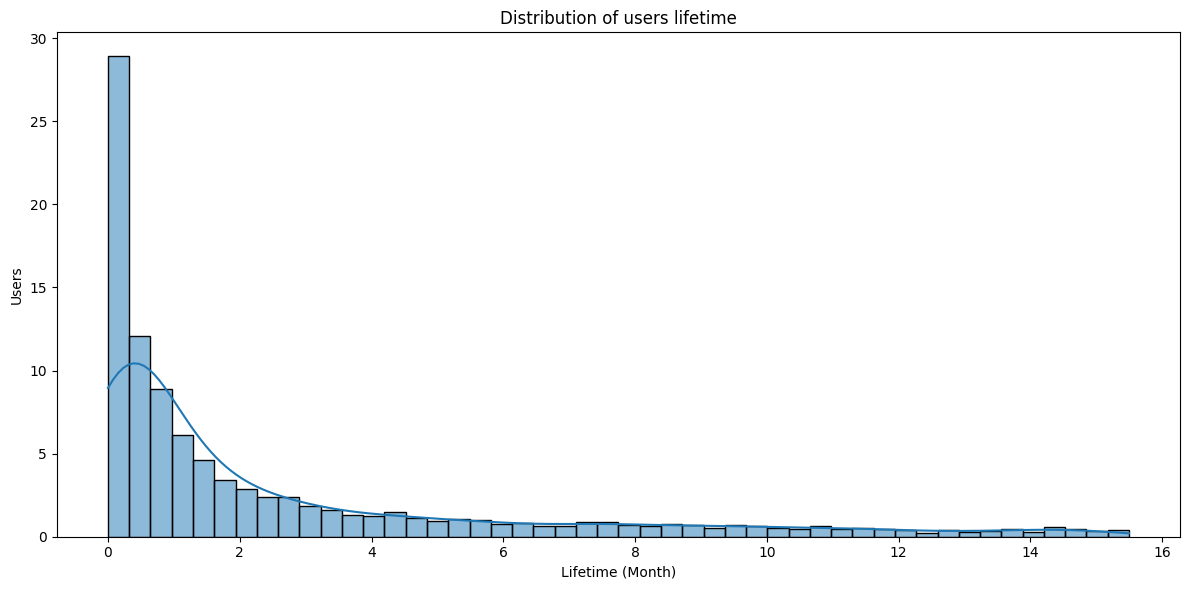

In [21]:
# Будем считать что пользватель может вернуться если прошло менее 3 недель с момента его последнего действия
# Будем отображать только 90 % пользователей с наименьшим временем жизни, чтобы не растягивать хвост графика
# Время жизни будем считать в месяцах

DescStatsAnalyzer.plot_lifetime_hist(
    events_frame.filter(conditions=[f'~user_id.isin({one_day_users.to_list()})']), # Удобно фильтровать по любому количесвту условий
    max_return_time=(3, 'W'),
    upper_cutoff_quantile=0.9, 
    plot_period='M',
    stat='percent'
)


Данный график демонстрирует что даже среди тех, кто не ушел в первый же день
* примерно 45% остаются только на месяц
* примерно 65% не задерживаются дольше чем на два месяца

## Посещаемость курса

In [22]:
from metrics.metric import MetricDinamic

Первая метрика, которую уместно оценить - количество активных пользвателей за разные периоды времени

In [23]:
unique_users_formula = lambda data: data.user_id.nunique()

active_users = MetricDinamic(
    formula=unique_users_formula, 
    name='unique_users',
    description='Количество уникальных пользователей'
)

In [24]:
active_users.compute(events_frame, period='D')

,date,unique_users
0,2015-06-15,705
1,2015-06-16,526
2,2015-06-17,440
3,2015-06-18,411
4,2015-06-19,377
...,...,...
1065,2018-05-15,145
1066,2018-05-16,155
1067,2018-05-17,165
1068,2018-05-18,126


# Сколько требуется времени чтобы пройти курс

Курс пройден, когда решено 85% практических заданий

In [58]:
from tooling import Funnel

In [45]:
practise_solving_events = events[events['action'] == 'passed_practise']\
    .sort_values(by=['user_id', 'timestamp'])

# Оставим только первое успешное решение каждого, без повторных попыток
practise_solving_events = practise_solving_events.drop_duplicates(['user_id', 'step_id'], keep='first')

In [47]:
practise_solving_events['solved_count'] = practise_solving_events.groupby(['user_id'])['step_id'].cumcount()

In [50]:
practise_solving_events['progress'] = practise_solving_events['solved_count']\
    .divide(len(practise_steps)).mul(100).round()

In [66]:
# По прогрессу отметим несколько контрольных точек и посмторим какой процент пользователей достигает их

def get_control_point(progress):
    if progress > 85:
        return 85
    if progress > 60:
        return 60
    if progress > 45:
        return 45
    if progress > 30:
        return 30
    if progress > 15:
        return 15
    return 0

practise_solving_events['control_point'] = practise_solving_events['progress'].apply(get_control_point)
practise_solving_events['control_point'] = practise_solving_events['control_point'].astype(str)

# Создадим набор данных, в котором событием будет событие получения контрольной точки
checkpoints = EventFrame(
    practise_solving_events,
    cols_schema={
        'user_id': 'user_id',
        'event_name': 'control_point',
        'event_timestamp': 'timestamp'
    }
)

In [67]:
checkpoints

EventFrame(data=216442 rows, columns=['step_id', 'timestamp', 'action', 'user_id', 'date', 'step_status', 'solved_count', 'progress', 'course_passed', 'control_point', 'event_id', 'event_type', 'event_type_index'])

In [68]:
funnel = Funnel()

In [74]:
funnel.plot(
    checkpoints,
    stages=list(map(str, [0, 15, 30, 45, 60, 85])),
    stages_names=list(map(lambda progress: f'Достигли прогресса в {progress}% ', [0, 15, 30, 45, 60, 85])),
)

In [51]:
practise_solving_events['course_passed'] = practise_solving_events['solved_count'] >= 0.85 * len(practise_steps)

FUNNEl

In [28]:
days_to_pass = pd.merge(
    # Время когда пользователь успешло прошел курс
    practise_solving_events[practise_solving_events['course_passed']].groupby('user_id').head(1),
    # Время когда пользователь первый раз заходил на курс
    events.groupby('user_id')['timestamp'].min()\
        .reset_index().rename(columns={'timestamp': 'first_action_time'}),
    how='inner',
    on='user_id'
).assign(days_to_pass= lambda df: (df['timestamp'] - df['first_action_time']).dt.days)\
    .loc[:, ('user_id', 'days_to_pass')]

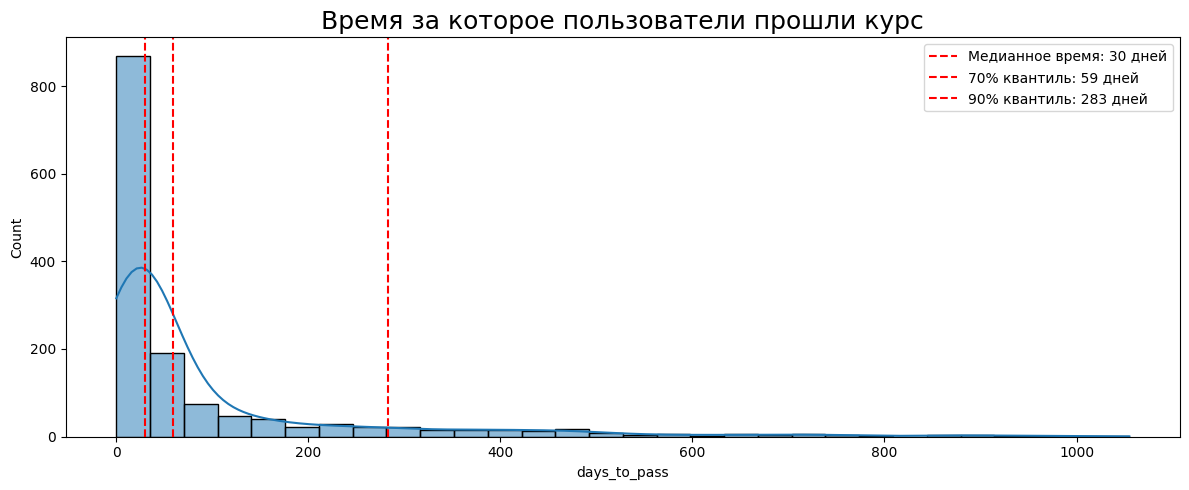

In [29]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(days_to_pass['days_to_pass'], bins=30, kde=True, ax=ax)

q50 = days_to_pass['days_to_pass'].quantile(0.5)
ax.axvline(x=q50, color='r', label=f'Медианное время: {q50:.0f} дней', linestyle='--')

q70 = days_to_pass['days_to_pass'].quantile(0.7)
ax.axvline(x=q70, color='r', label=f'70% квантиль: {q70:.0f} дней', linestyle='--')

q90 = days_to_pass['days_to_pass'].quantile(0.9)
ax.axvline(x=q90, color='r', label=f'90% квантиль: {q90:.0f} дней', linestyle='--')

ax.set_title('Время за которое пользователи прошли курс', fontsize=18)
ax.legend()

plt.tight_layout()

# Когортный анализ

In [30]:
from tooling import Cohorts

In [31]:
cohorts = Cohorts()

In [32]:
# Расчет будет производиться по месяцам
# параметр normalize отвечает за то чтобы считатть не абсолютное количество пользователей, а оставшихся 
# относительно тех, кто был в группе в начале периода
# Чтобы получить абсолютное количество пользователей достаточно установить normalize в False

time_unit_cohorts_tabele = cohorts.fit(
    events_frame, 
    cohort_period='M', 
    normalize=True
)

In [33]:
# Пример полученной когортной таблицы
time_unit_cohorts_tabele.head()

cohort_time_unit,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,...,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
cohort_group,,,,,,,,,,,,,,,,,,,,,
2015-06-01,1.0,0.5065,0.108329,0.087626,0.090997,0.063072,0.047183,0.040924,0.054405,0.064998,...,0.021184,0.025999,0.020703,0.023110,0.017333,0.017814,0.019740,0.019259,0.020703,0.010592
2015-07-01,NaN,1.0000,0.082613,0.048991,0.039385,0.020173,0.016330,0.017291,0.028818,0.015370,...,0.004803,0.009606,0.007685,0.006724,0.007685,0.005764,0.006724,0.008646,0.005764,0.001921
2015-08-01,NaN,NaN,1.000000,0.167224,0.120401,0.043478,0.026756,0.040134,0.033445,0.030100,...,0.016722,0.000000,0.010033,0.006689,0.006689,0.010033,0.006689,0.006689,0.000000,0.003344
2015-09-01,NaN,NaN,NaN,1.000000,0.149220,0.086860,0.048998,0.013363,0.022272,0.031180,...,0.011136,0.002227,0.006682,0.015590,0.011136,0.013363,0.011136,0.015590,0.006682,0.008909
2015-10-01,NaN,NaN,NaN,NaN,1.000000,0.189459,0.091168,0.042735,0.045584,0.044160,...,0.008547,0.009972,0.017094,0.018519,0.012821,0.009972,0.007123,0.014245,0.011396,0.008547


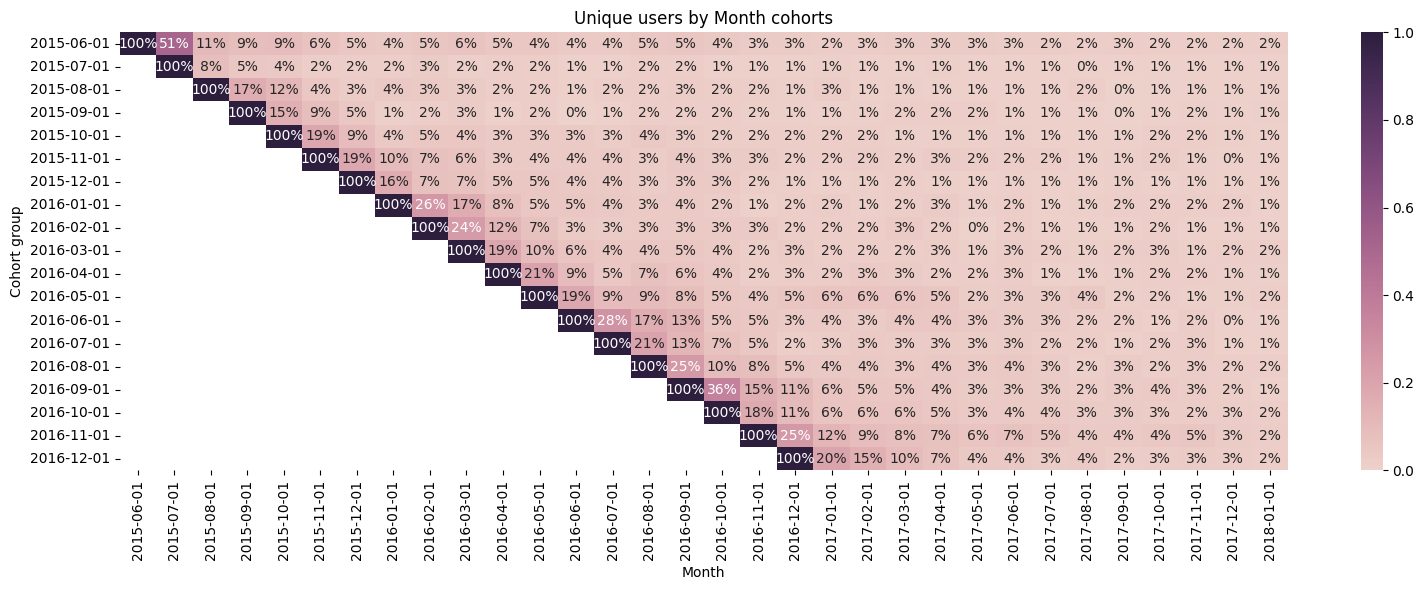

In [34]:
cohorts.plot(max_cohort='2016-12-12', max_time_unit='2018-01-01', cmap=sns.cubehelix_palette(as_cmap=True))

Данный график демонстрирует 
* спустя месяц от поступления на курс чаще всего остается только одня пятая от изначальной аудитории
* Спустя два месяца и боле остаются уже только единичные заходы

Для более детального понимания удобно бцдет оценивать кагорты ни месяцу, а по количеству периодов, прошедших с первого визита  
Также уместно рассчитать когорты по неделям, т.к. это можетоказаться более репрезентативно

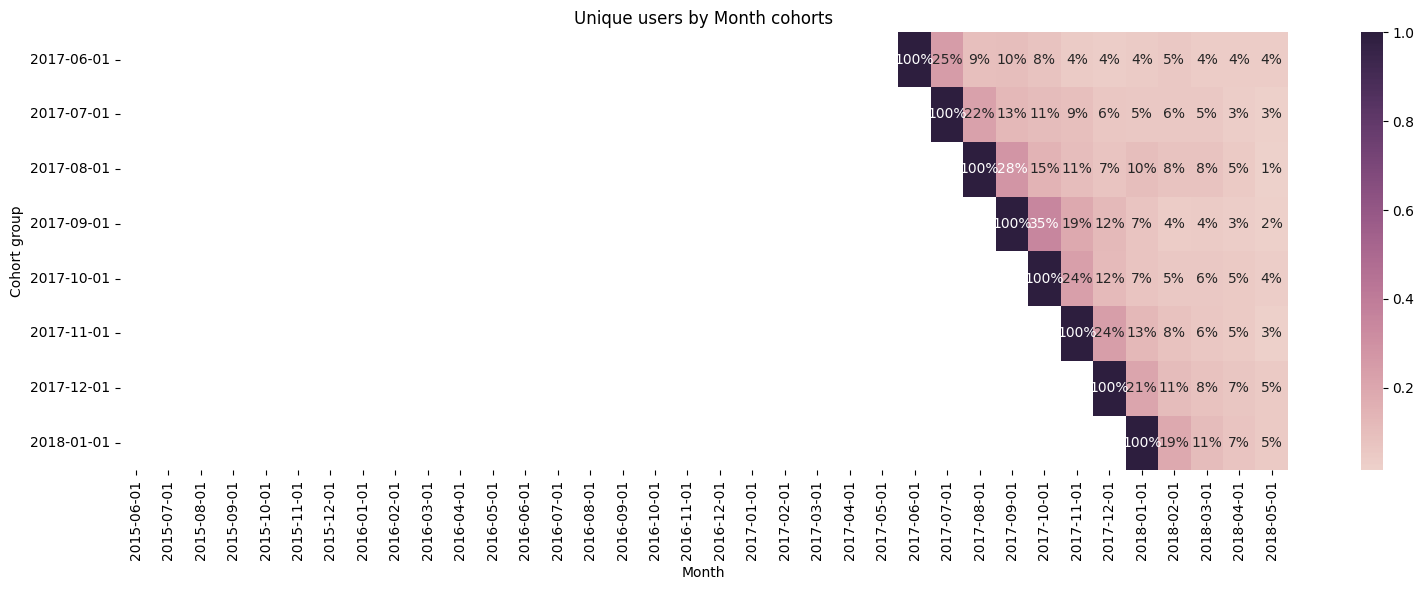

In [35]:
# cohorts.fit(
#     events_frame, 
#     represent_by='period', # Количество периодов после первого визита в продукт
#     cohort_period='W', 
#     normalize=True
# )

cohorts.plot(min_cohort='2017-06-01', max_cohort='2018-01-01', min_period=1, max_period=10, cmap=sns.cubehelix_palette(as_cmap=True))

* В большинстве случаев к концу первой ндели на курсе остается только треть учеников
* К концу второй недели остается только шестая часть
* Спуся еще неделю аудитория меняется не значительно, что говорит о том, что за две недели удается вовлечь и замотивировать учеников 
* На четвертой неделе начинается спад аудитории, а после пятой возвращаются уже крайне редко.

Что это значит:  
Это нормально, что в первую недели отсеиваются две трети пользователей, т.к. многие могут понять что материал не для них  
Плохо то, что за вторую неделю отваливается почти половина от оставшихся, ведь эта часть аудитории, которая смогла проучится неделю, но так и не нашла для себя мотивацию продолжать  
4 недели достаточно для прохождения курса, поэтому снижение аудитории после этого рубежа также нормально

# Почему пользователи уходят в первый же день

Ранее удалось выяснить что после первого же дня уходят 50% пользователей  
Необходимо вяснить как они ведут себя в течении первого дня, с какими тружностями сталкиваются и что становится поводом уйти

Для выяснение этих вопросов уместно использовать пошаговые матрицы действий и диаграммы потока

In [16]:
from ux_researching import StepMatrix, StepSankey
from data_preprocessing import SplitSessionsPreprocessor

In [17]:
first_day_events = pd.merge(
    # Все события
    events,
    # Дата первого визита на курс для пользователя
    events.groupby('user_id')['timestamp'].min().dt.date\
        .reset_index().rename(columns={'timestamp': 'first_action_date'}),
    how='inner',
    on='user_id'
).query('first_action_date==date')

In [30]:
# Создаем фрейм событий и передаем в него данные о событиях и схему соответсвия колонок
one_day_users_events = EventFrame(
    events[events['user_id'].isin(one_day_users)], 
    cols_schema=cols_schema
)

In [31]:
# Доабвляем информацию о сессиях 
# Учитывая контекст уместно предположить что перерыв более 30 минут означает прерывание сессии

session_spliter = SplitSessionsPreprocessor(timeout=(30, 'M'))

In [36]:
one_day_users_events = session_spliter.apply(one_day_users_events)

In [37]:
# Теперь каждое дейтсивие будет относиться к сессии
one_day_users_events.to_dataframe().head()

,step_id,timestamp,action,user_id,date,step_status,event_id,event_type,event_type_index,session_id
1347416,31981,2016-09-02 14:44:24,session_start,1,2016-09-02,practise,1_1session_start,session_start,1,1_1
1347416,31981,2016-09-02 14:44:24,viewed_practise,1,2016-09-02,practise,0,raw,2,1_1
1347417,31981,2016-09-02 14:44:24,discovered_practise,1,2016-09-02,practise,1,raw,2,1_1
1347417,31981,2016-09-02 14:44:24,session_end,1,2016-09-02,practise,1_1session_end,session_end,3,1_1
3216426,32815,2018-03-21 12:17:40,session_start,7,2018-03-21,theory,7_1session_start,session_start,1,7_1


In [38]:
step_matrix = StepMatrix(one_day_users_events)

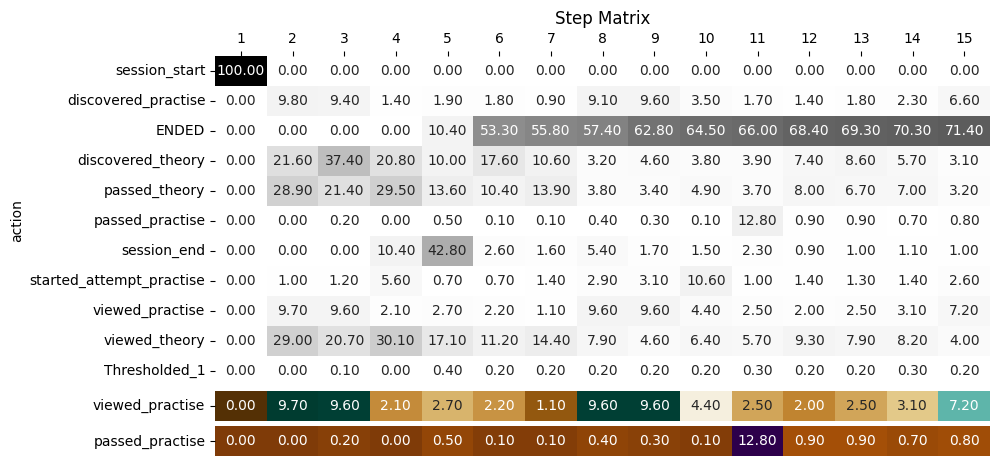

In [41]:
step_matrix.plot(
    max_steps=15, 
    threshold=0.05, 
    weight_col='user_id',
    target_events=['viewed_practise', 'passed_practise']
)

Для более точного изучения последовательности действий необходимо отобразить диаграмму потока

In [42]:
step_sankey = StepSankey(one_day_users_events)
step_sankey.plot(
    max_steps=8, 
    threshold=0.05, 
    weight_col='user_id',
    events_to_keep=['viewed_practise', 'passed_practise']
)

Из анализа этих графиков можно сделать достаточно неожиданные выводы:
* Почти половина пользователей уходит после третьего шага, успев решить 1-2 теоретических задания
* Среди тех, кто сталкивается с практическим заданием только половина начинает его решать и только 10% от них его успешно решает, остальные покидают курс
* Пользователей хватает еще на 3-4 степа, после чего они безвозвратно покидают курс, что важнее они продолжают выполнять задания успешно, но все равно уходят, что говорит не о сложности, а скорее об отсутствии мотивации продолжать